
Nama: Dwi Putra Satria utama






`Objective:`

Tujuan dari proyek ini adalah untuk membangun model prediksi yang dapat mengidentifikasi kemungkinan default seorang debitur berdasarkan berbagai fitur yang tersedia. Dengan menggunakan data historis tentang jumlah kredit, dll kita dapat memprediksi apakah seorang debitur akan gagal membayar.

`Problem Statement:`

Dalam proyek ini, saya akan membangun sebuah model klasifikasi yang dapat memprediksi apakah seorang debitur akan gagal membayar pada bulan berikutnya. Menggunakan dataset yang mencakup informasi hubungan antara fitur-fitur dengan status default pembayaran. Dengan demikian, model yang dihasilkan dapat digunakan untuk memberikan insight kepada institusi keuangan dalam mengidentifikasi risiko kredit yang lebih tinggi dan mengambil langkah-langkah pencegahan yang sesuai untuk mengelola risiko.

Dengan memprediksi kemungkinan status debitur yang gagal bayar, institusi keuangan dapat mengambil tindakan yang diperlukan, seperti memberikan peringatan kepada debitur yang berpotensi gagal membayar atau menyesuaikan limit kredit secara proaktif. Selain itu, model ini dapat digunakan sebagai alat yang berguna dalam pengambilan keputusan terkait penilaian kredit dan manajemen risiko.

Pada kali ini kita akan fokus ke penilaian `recall` karena ingin memprediksi secara akurat `(true positive)` orang-orang yang berkemungkinan gagal bayar `(1)`

# 2 - Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency


# 3 - Data loading

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

# menampilkan 10 baris pertama
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


- person_age: Usia seseorang.

- person_income: Pendapatan tahunan seseorang.

- person_home_ownership: Kepemilikan rumah seseorang.

- person_emp_length: Lamanya seseorang bekerja (dalam tahun).

- loan_intent: Tujuan peminjaman.

- loan_grade: Tingkat kredit peminjaman.

- loan_amnt: Jumlah pinjaman.

- loan_int_rate: Tingkat suku bunga pinjaman.

- loan_status: Status pinjaman (0 jika tidak gagal bayar, 1 jika gagal bayar).

- loan_percent_income: Persentase pendapatan yang digunakan untuk pembayaran pinjaman.

- cb_person_default_on_file: Riwayat gagal bayar sebelumnya (Y= ya, N= tidak).

- cb_preson_cred_hist_length: Lama riwayat kredit.

In [3]:
# menampilkan 10 baris terakhir
df.tail(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26
32572,52,52000,OWN,0.0,PERSONAL,A,9600,8.49,0,0.18,N,22
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N,19
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [4]:
# copy data
df_copy=df.copy()

Diperlukan jika dibutuhkan

# 4 - Eksploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Data terdiri dari 32581 baris dan 12 kolom

Terdapat missing value

Sebagian data adalah numerik dan sebagian lainnya merupakan kategori

In [6]:
# cek data hilang
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Data hilang akan kita handling dengan cara dihapus agar tidak mengacaukan model

In [7]:
# menghapus data yang hilang
df.dropna(inplace=True)

In [8]:
# menghitung data yang terduplikasi
duplicate = df.duplicated().sum()
duplicate

137

Data duplikat akan kita hapus agar tidak mengcaukan model

In [9]:
# handling data duplikat
df = df.drop_duplicates()

In [10]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


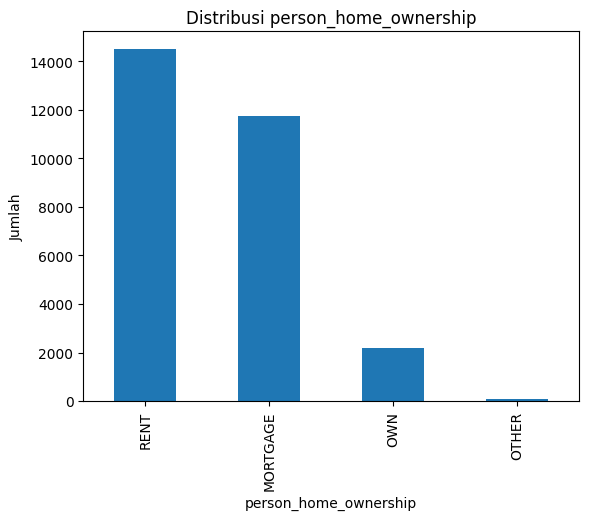

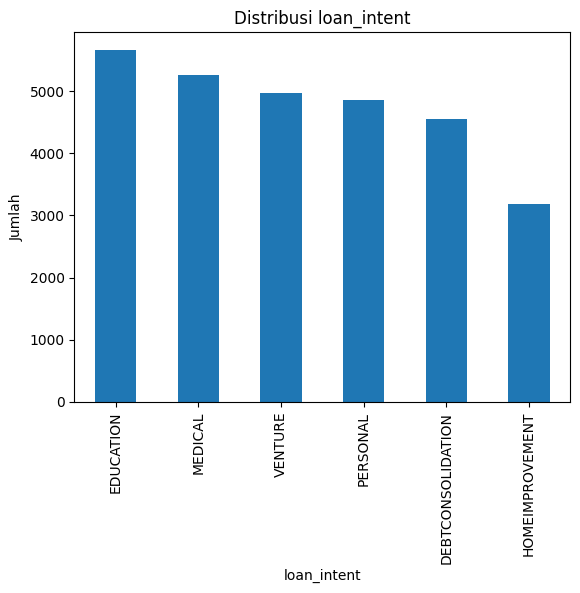

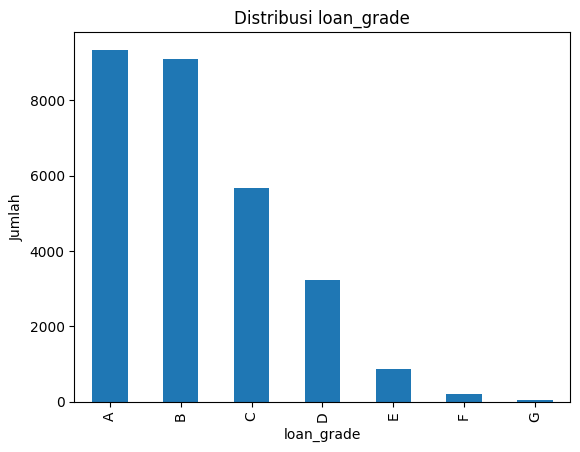

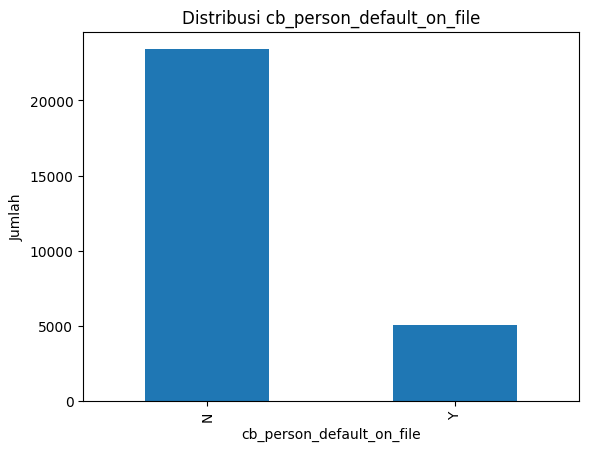

RENT        14498
MORTGAGE    11736
OWN          2174
OTHER          93
Name: person_home_ownership, dtype: int64

EDUCATION            5670
MEDICAL              5269
VENTURE              4969
PERSONAL             4859
DEBTCONSOLIDATION    4547
HOMEIMPROVEMENT      3187
Name: loan_intent, dtype: int64

A    9345
B    9094
C    5682
D    3243
E     869
F     209
G      59
Name: loan_grade, dtype: int64

N    23411
Y     5090
Name: cb_person_default_on_file, dtype: int64



In [11]:
# cek jumlah kategori dan visualisasi distribusi
# Kolom-kolom kategorikal
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Visualisasi distribusi
for column in categorical_columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    plt.show()

# Pemeriksaan jumlah kategori
for column in categorical_columns:
    print(df[column].value_counts())
    print()




Berdasarkan hasil pemeriksaan jumlah kategori (count) pada setiap kolom kategorikal yang telah dihitung, dapat disimpulkan sebagai berikut:

person_home_ownership:

- Mayoritas pelanggan memiliki status "RENT" (sewa) dengan jumlah sebanyak 14.498.
- Jumlah pelanggan yang memiliki status "MORTGAGE" (KPR) sebanyak 11.736.
- Terdapat sejumlah kecil pelanggan yang memiliki status "OWN" (milik sendiri) sebanyak 2.174.
- Hanya sedikit pelanggan yang memiliki status "OTHER" (lainnya) sebanyak 93.


loan_intent:

- Tujuan peminjaman yang paling umum adalah "EDUCATION" (pendidikan) dengan jumlah sebanyak 5.670.
- Jumlah pelanggan yang memiliki tujuan peminjaman "MEDICAL" (medis) adalah 5.269.
- Terdapat jumlah yang serupa untuk tujuan peminjaman "VENTURE" (usaha/venture) dan "PERSONAL" (pribadi), masing-masing sebanyak 4.969 dan 4.859.
- Ada jumlah yang lebih sedikit pelanggan yang menggunakan peminjaman untuk "DEBTCONSOLIDATION" (konsolidasi hutang) sebanyak 4.547.
- Tujuan peminjaman "HOMEIMPROVEMENT" (perbaikan rumah) memiliki jumlah pelanggan yang lebih rendah, yaitu 3.187.

loan_grade:

- Mayoritas pinjaman memiliki tingkat kredit "A" dengan jumlah sebanyak 9.345.
- Jumlah pinjaman dengan tingkat kredit "B" hampir sama tingginya, yaitu 9.094.
- Jumlah pinjaman dengan tingkat kredit "C" adalah 5.682.
- Tingkat kredit "D" memiliki jumlah pinjaman yang lebih rendah, yaitu 3.243.
- Tingkat kredit "E", "F", dan "G" memiliki jumlah pinjaman yang semakin berkurang, dengan jumlah yang paling sedikit terdapat pada tingkat kredit "G" sebanyak 59.

cb_person_default_on_file:

-Mayoritas pelanggan (23.411) tidak memiliki riwayat gagal bayar ("N").
-Sebagian kecil pelanggan (5.090) memiliki riwayat gagal bayar sebelumnya ("Y").

In [12]:
# Cek korelasi fitur kategori dengan target
# Uji chi-square
for column in categorical_columns:
    crosstab = pd.crosstab(df[column], df['loan_status'])
    chi2, p_value, dof, expected = chi2_contingency(crosstab)
    
    print(f"Uji chi-square kolom {column}:")
    print(f"Chi-square: {chi2}")
    print(f"P-value: {p_value}")
    print("")

Uji chi-square kolom person_home_ownership:
Chi-square: 1639.6586711937
P-value: 0.0

Uji chi-square kolom loan_intent:
Chi-square: 464.6462059759655
P-value: 3.401431713321606e-98

Uji chi-square kolom loan_grade:
Chi-square: 5109.525170864878
P-value: 0.0

Uji chi-square kolom cb_person_default_on_file:
Chi-square: 947.0399725840961
P-value: 5.83688870246458e-208



Berdasarkan perhitungan tersebut menunjukkan hubungan yang signifikan (dibawah 0.05) secara statistik dengan variabel target dalam dataset. Oleh karena itu, semua fitur ini dapat digunakan sebagai fitur dalam model.

In [13]:
# menghitung nilai cardinality kolom kategorikal
cardinality_values = {}
unique_values = {}
for col in categorical_columns:
    cardinality_values[col] = df[col].nunique()
    unique_values[col] = df[col].unique()

# menampilkan hasil cardinality 
for col in categorical_columns:
    print(f"jumlah cardinality {col}: {cardinality_values[col]}")
    print(f"unique value {col}: {unique_values[col]}")
    print("\n")

jumlah cardinality person_home_ownership: 4
unique value person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']


jumlah cardinality loan_intent: 6
unique value loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


jumlah cardinality loan_grade: 7
unique value loan_grade: ['D' 'B' 'C' 'A' 'E' 'F' 'G']


jumlah cardinality cb_person_default_on_file: 2
unique value cb_person_default_on_file: ['Y' 'N']




In [14]:
# Kolom-kolom numerik
numeric_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Menghitung korelasi antara variabel numerik dengan variabel target
correlation_results = df[numeric_columns + ['loan_status']].corr()['loan_status'].drop('loan_status')

print(correlation_results)

person_age                   -0.024091
person_income                -0.140456
person_emp_length            -0.082852
loan_amnt                     0.114153
loan_int_rate                 0.339995
loan_percent_income           0.380000
cb_person_cred_hist_length   -0.016559
Name: loan_status, dtype: float64


Dari hasil tersebut saya memutuskan untuk menggunakan beberapa fitur dengan alasan sebagai berikut:

- person_income: Fitur ini memiliki korelasi negatif (-0.140456) dengan loan_status. Pendapatan tahunan pelanggan dapat menjadi faktor penting dalam memprediksi risiko gagal bayar. Semakin tinggi pendapatan, kemungkinan lebih rendah bagi seseorang untuk gagal bayar pada pinjaman.

- loan_int_rate: Fitur ini memiliki korelasi positif yang cukup tinggi (0.339995) dengan loan_status. Tingkat suku bunga pinjaman dapat mencerminkan risiko yang terkait dengan pinjaman tersebut. Semakin tinggi suku bunga, kemungkinan lebih tinggi bagi seseorang untuk gagal bayar.

- loan_percent_income: Fitur ini memiliki korelasi positif yang cukup tinggi (0.380000) dengan loan_status. Persentase pendapatan yang digunakan untuk pembayaran pinjaman dapat mengindikasikan tingkat beban keuangan seseorang. Semakin besar persentase pendapatan yang digunakan untuk pinjaman, kemungkinan lebih tinggi bagi seseorang untuk gagal bayar.

Jumlah: 0    22313
1     6188
Name: loan_status, dtype: int64


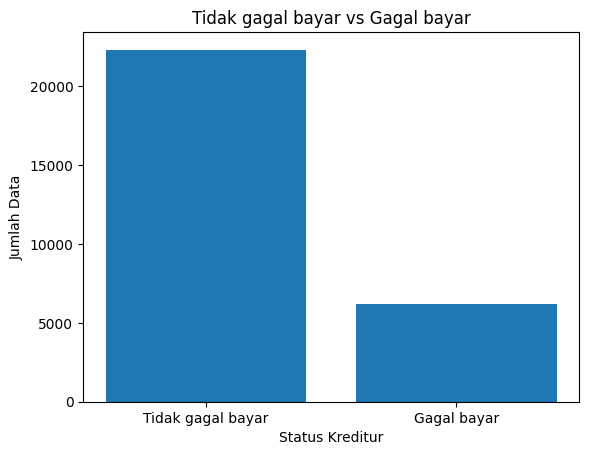

In [15]:
# cek data target

# Hitung jumlah data
status_count = df['loan_status'].value_counts()
print('Jumlah:', status_count)

# Visualisasi perbandingan jumlah data
plt.bar(status_count.index, status_count.values)
plt.xlabel('Status Kreditur')
plt.ylabel('Jumlah Data')

# Atur label sumbu x
plt.xticks([0, 1], ['Tidak gagal bayar', 'Gagal bayar'])

# Atur judul dan sumbu y
plt.title('Tidak gagal bayar vs Gagal bayar')
plt.ylabel('Jumlah Data')

plt.show()

Data target imbalace

In [16]:
# cek data dengan .describe
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28501.000000,2.850100e+04,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000,28501.000000
mean,27.738676,6.665441e+04,4.790148,9658.533034,11.045385,0.217115,0.169517,5.800498
std,6.316166,6.237603e+04,4.157462,6329.604672,3.230748,0.412289,0.106410,4.042153
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.950000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Berdasarkan deskriptif tersebut dapat disimpulkan sebagai berikut:

person_age:

- Usia pelanggan berkisar antara 20 hingga 144 tahun, dengan rata-rata sekitar 27 tahun.
- Standar deviasi yang relatif kecil (6.32) menunjukkan bahwa sebagian besar pelanggan berada dalam kisaran usia yang serupa.

person_income:

- Pendapatan tahunan pelanggan berkisar antara 4.000 hingga 6.000.000, dengan rata-rata sekitar 66.654,41.
- Standar deviasi yang cukup besar (62.376,03) menunjukkan variasi yang signifikan dalam pendapatan pelanggan.

person_emp_length:

- Lama bekerja pelanggan berkisar antara 0 hingga 123 tahun, dengan rata-rata sekitar 4,79 tahun.
- Standar deviasi yang cukup besar (4,16) menunjukkan variasi yang signifikan dalam lama bekerja pelanggan.

loan_amnt:

- Jumlah pinjaman berkisar antara 500 hingga 35.000, dengan rata-rata sekitar 9.658,53.
- Standar deviasi yang cukup besar (6.329,60) menunjukkan variasi yang signifikan dalam jumlah pinjaman.
Nilai kuartil pertama (Q1) adalah sebesar 5.000, dan nilai kuartil ketiga (Q3) adalah sebesar 12.500.

loan_int_rate:

- Tingkat suku bunga pinjaman berkisar antara 5,42 hingga 23,22, dengan rata-rata sekitar 11,04.
- Standar deviasi yang sedang (3,23) menunjukkan variasi yang cukup signifikan dalam tingkat suku bunga.


loan_status:

- Fitur ini memiliki nilai 0 atau 1, dengan rata-rata sekitar 0,22.
- Sebanyak 21,7% dari data memiliki nilai loan_status 1, yang menunjukkan bahwa sekitar 21,7% dari pelanggan mengalami gagal bayar pada pinjaman.

loan_percent_income:

- Persentase pendapatan yang digunakan untuk pembayaran pinjaman berkisar antara 0 hingga 0,83, dengan rata-rata sekitar 0,17.
- Standar deviasi yang relatif kecil (0,11) menunjukkan bahwa sebagian besar pelanggan menggunakan persentase pendapatan yang serupa untuk pembayaran pinjaman.

cb_person_cred_hist_length:

- Lama riwayat kredit pelanggan berkisar antara 2 hingga 30 tahun, dengan rata-rata sekitar 5,8 tahun.
- Standar deviasi yang sedang (4,04) menunjukkan variasi yang cukup signifikan dalam lama riwayat kredit.


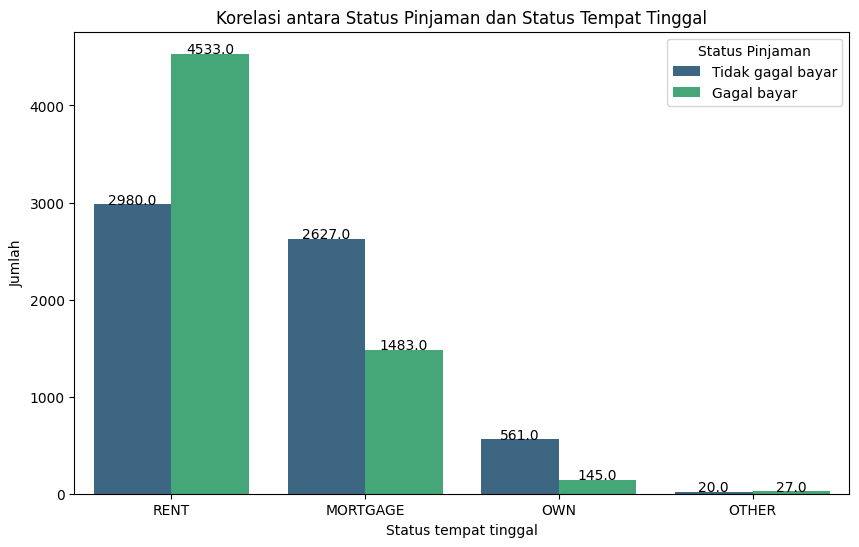

In [69]:
# Membuat clustered bar plot
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(x='person_home_ownership', hue='loan_status', data=df, palette='viridis')

# Menambahkan label di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 0.1), ha='center')

plt.legend(title='Status Pinjaman', loc='upper right', labels=['Tidak gagal bayar', 'Gagal bayar'])
plt.title('Korelasi antara Status Pinjaman dan Status Tempat Tinggal')
plt.xlabel('Status tempat tinggal')
plt.ylabel('Jumlah')

# Menampilkan plot
plt.show()



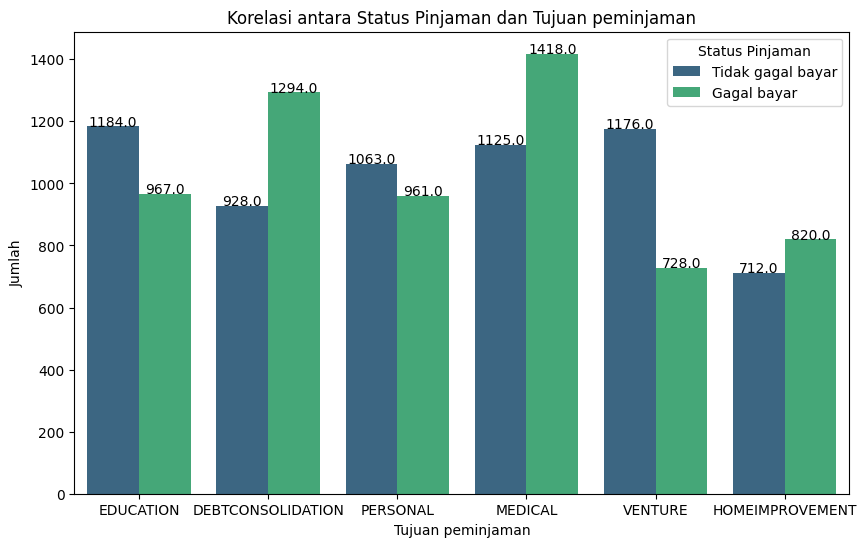

In [70]:
# Membuat clustered bar plot
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(x='loan_intent', hue='loan_status', data=df, palette='viridis')

# Menambahkan label di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 0.1), ha='center')

plt.legend(title='Status Pinjaman', loc='upper right', labels=['Tidak gagal bayar', 'Gagal bayar'])
plt.title('Korelasi antara Status Pinjaman dan Tujuan peminjaman')
plt.xlabel('Tujuan peminjaman')
plt.ylabel('Jumlah')

# Mengubah skala sumbu y
plt.yticks(np.arange(0, 1600, 200))

# Menampilkan plot
plt.show()



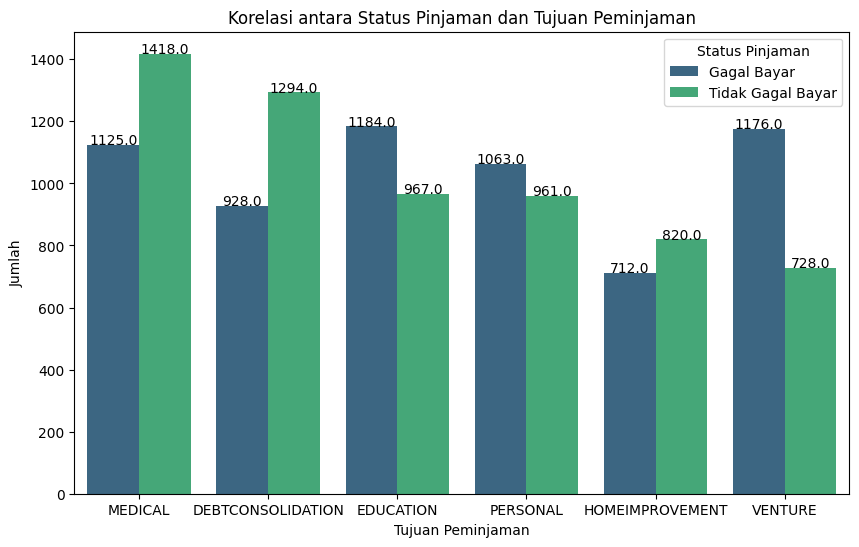

In [82]:
# Menghitung jumlah peminjaman berdasarkan tujuan dan status
loan_counts = df.groupby(['loan_intent', 'loan_status']).size().reset_index(name='count')

# Membuat DataFrame untuk peminjaman yang gagal
failed_loans = loan_counts[loan_counts['loan_status'] == 1].sort_values(by='count', ascending=False)

# Menambahkan kategori yang tidak gagal bayar
successful_loans = loan_counts[loan_counts['loan_status'] == 0]

# Menggabungkan DataFrame untuk kategori gagal dan tidak gagal bayar
merged_df = pd.concat([failed_loans, successful_loans], ignore_index=True)

# Membuat grouped bar plot
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x='loan_intent', y='count', hue='loan_status', data=merged_df, palette='viridis')

# Menambahkan label di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 0.1), ha='center')

plt.title('Korelasi antara Status Pinjaman dan Tujuan Peminjaman')
plt.xlabel('Tujuan Peminjaman')
plt.ylabel('Jumlah')
plt.legend(title='Status Pinjaman', handles=handles, labels=['Gagal Bayar', 'Tidak Gagal Bayar'])

# Menampilkan plot
plt.show()

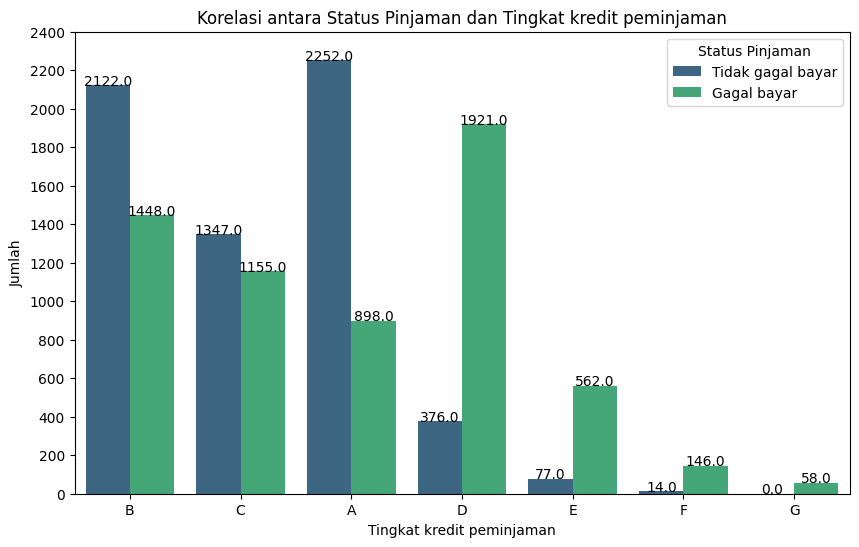

In [72]:
# Membuat clustered bar plot
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(x='loan_grade', hue='loan_status', data=df, palette='viridis')

# Menambahkan label di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 0.1), ha='center')

plt.legend(title='Status Pinjaman', loc='upper right', labels=['Tidak gagal bayar', 'Gagal bayar'])
plt.title('Korelasi antara Status Pinjaman dan Tingkat kredit peminjaman')
plt.xlabel('Tingkat kredit peminjaman')
plt.ylabel('Jumlah')

# Mengubah skala sumbu y
plt.yticks(np.arange(0, 2500, 200))

# Menampilkan plot
plt.show()



# 5 - Data preprocessing

## Balancing data

In [17]:
df = df.sort_values(by='loan_status')

# Balancing data
no_default = df[df["loan_status"] == 0].head(6188)
default = df[df["loan_status"] == 1].head(6188)


# concatenate
df = pd.concat([no_default, default])

# reset  index 
df = df.reset_index(drop=True)

# hitung jumlah data
target = df['loan_status'].value_counts()
print('Jumlah:', target)

Jumlah: 0    6188
1    6188
Name: loan_status, dtype: int64


## Feature selection

Berdasarkan analisis pada EDA kita akan menggunakan fitur-fitur berikut:

'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'person_income', 'loan_int_rate', 'loan_percent_income'

## Memisihkan antara fitur `X` dan target `y`

In [18]:
# splitting X dan y
X = df[['person_home_ownership', 'loan_intent', 'loan_grade',
        'cb_person_default_on_file', 'person_income', 'loan_int_rate', 'loan_percent_income']]

y = df['loan_status']



## Memisahkan antara train dan test

In [19]:
# splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print(X_train.shape)
print(X_test.shape)

(9900, 7)
(2476, 7)


## Handling outliers

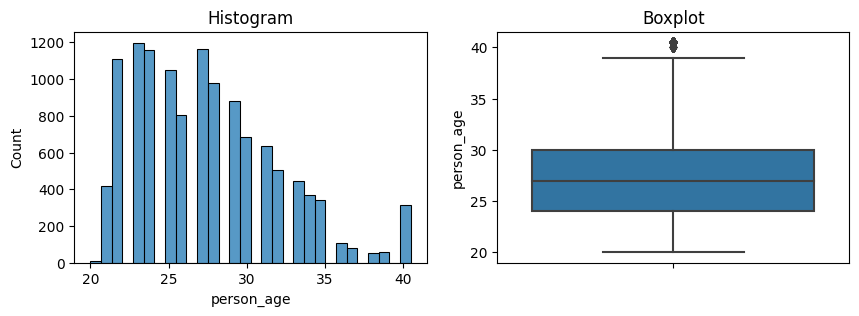

Skewness: 0.7980949814885778
The distribution is skewed


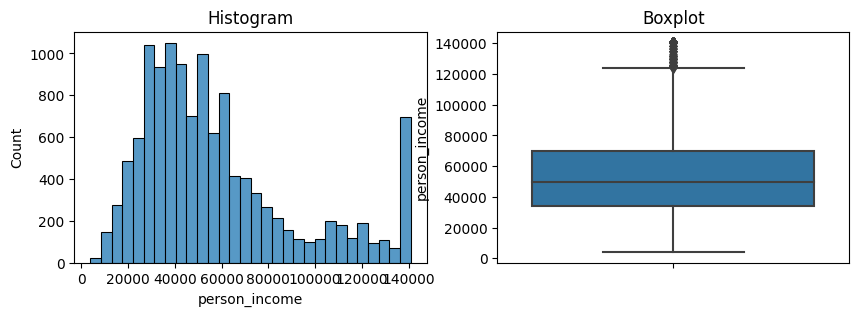

Skewness: 1.1111156046203012
The distribution is skewed


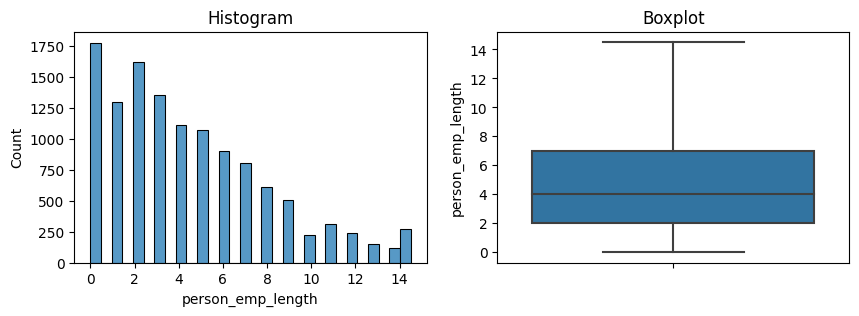

Skewness: 0.8661048193624299
The distribution is skewed


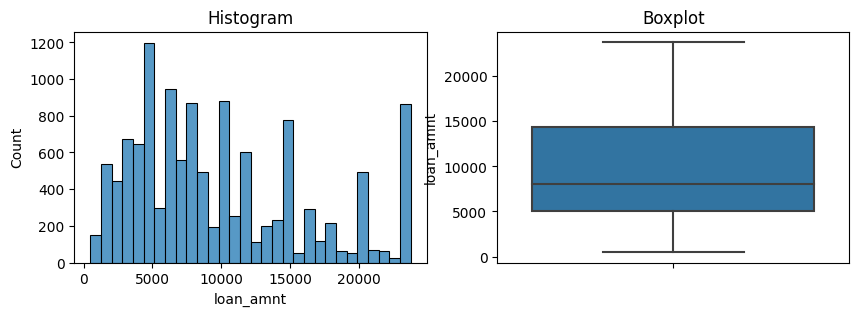

Skewness: 0.7624378141771897
The distribution is skewed


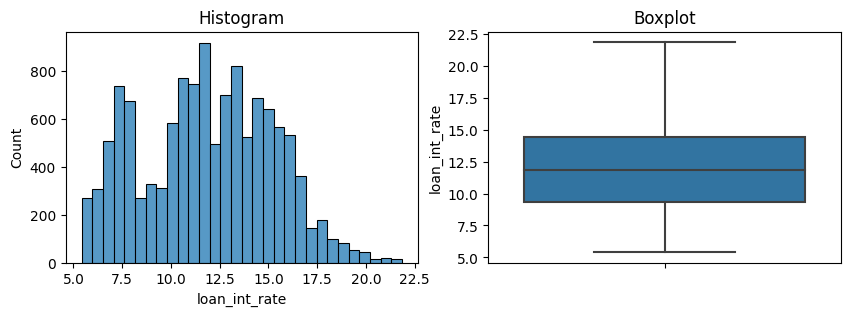

Skewness: 0.030038442283378066
The distribution is normal


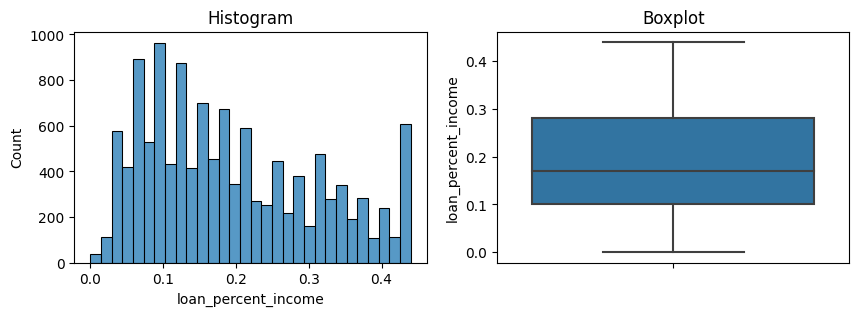

Skewness: 0.5480892890975461
The distribution is skewed


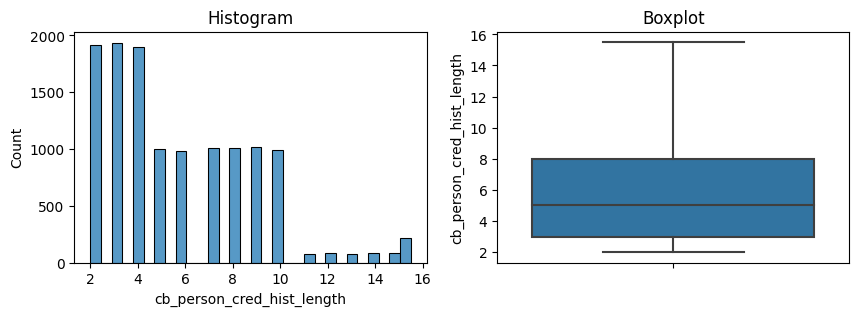

Skewness: 0.8776600082440948
The distribution is skewed


In [58]:
# Cek visualisasi dengan histogram dan boxplot

numeric_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Cek distribusi data dan outliers
def check_distribution_outliers(df, columns):
    for column in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[column])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[column].skew())
        if (df[column].skew() <= -0.5) or (df[column].skew() >= 0.5):
            print('The distribution is skewed')
        else:
            print('The distribution is normal')

check_distribution_outliers(df[numeric_columns], numeric_columns)

Berdasarkan data tersebut sebagian data terdistribusi secara skewed dan terdapat outliers yang selanjutkan akan dihandling

In [59]:
# Fungsi untuk penanganan outlier dengan IQR winsorization
def iqr_winsorize_column(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    winsorized = df[column].clip(lower_bound, upper_bound)
    df[column] = winsorized
    return df

# Penanganan outlier dengan IQR winsorization
for feature in numeric_columns:
    df = iqr_winsorize_column(df, feature)

## Feature scaling & encoding

In [60]:
X.head(3)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,loan_int_rate,loan_percent_income
0,RENT,EDUCATION,B,N,27500,10.99,0.15
1,RENT,DEBTCONSOLIDATION,B,N,42000,10.08,0.12
2,MORTGAGE,PERSONAL,C,Y,43000,12.99,0.12


In [61]:
numerical_columns = ['person_income', 'loan_int_rate', 'loan_percent_income']
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
ordinal_columns = ['loan_grade']

# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('ord', ordinal_transformer, ordinal_columns)
    ])


In [62]:

# logreg pipeline
model_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=20))
])


# svm pipeline
model_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC (random_state=20))
])


# dt pipeline
model_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=20))
])


# random forest pipeline
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=20))
])

# KNN pipeline
model_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# 6 - Model

## Logistic regression

In [63]:
# model training

model_logreg.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_income',
                                                   'loan_int_rate',
                                                   'loan_percent_income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['loan_grade'])])),
                ('classifier', LogisticRegression(random_state=20))])

In [64]:
# model predict

y_pred_train_logreg = model_logreg.predict(X_train)
y_pred_test_logreg = model_logreg.predict(X_test)
y_pred_train_logreg

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [66]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_logreg))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_logreg))

Hasil prediksi train-set
[[4009  924]
 [1085 3882]]

 Hasil prediksi test-set
[[1049  206]
 [ 284  937]]


In [68]:
# classification report train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_logreg))

# Classification report test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_logreg))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4933
           1       0.81      0.78      0.79      4967

    accuracy                           0.80      9900
   macro avg       0.80      0.80      0.80      9900
weighted avg       0.80      0.80      0.80      9900


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.79      0.84      0.81      1255
           1       0.82      0.77      0.79      1221

    accuracy                           0.80      2476
   macro avg       0.80      0.80      0.80      2476
weighted avg       0.80      0.80      0.80      2476



Analisis dari hasil recall adalah sebagai berikut:

Pada train-set, recall untuk kelas 0 (tidak gagal membayar) adalah 0.81, yang berarti model mampu mengidentifikasi sebagian besar sampel yang tidak gagal membayar secara akurat. Namun, recall untuk kelas 1 (gagal membayar) adalah 0.78.

Pada test-set, recall untuk kelas 0 adalah sekitar 0.84, menunjukkan bahwa model juga mampu mengidentifikasi sebagian besar sampel yang tidak gagal membayar dengan akurat pada data uji. Namun, recall untuk kelas 1 adalah sekitar 0.77, yang menunjukkan bahwa model mungkin mengalami kesulitan dalam mengenali semua sampel yang gagal membayar pada data uji.


Dengan demikian model ini dapat dikategorikan overfit.

## SVM

In [69]:
# model training
model_svm.fit(X_train, y_train) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_income',
                                                   'loan_int_rate',
                                                   'loan_percent_income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['loan_grade'])])),
                ('classifier', SVC(random_state=20))])

In [70]:
# model predict
y_pred_train_svm = model_svm.predict(X_train)
y_pred_test_svm = model_svm.predict(X_test)

In [71]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_svm))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_svm))

Hasil prediksi train-set
[[4485  448]
 [1211 3756]]

 Hasil prediksi test-set
[[1149  106]
 [ 313  908]]


In [72]:
# classification report train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_svm))

# classification report test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_svm))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.79      0.91      0.84      4933
           1       0.89      0.76      0.82      4967

    accuracy                           0.83      9900
   macro avg       0.84      0.83      0.83      9900
weighted avg       0.84      0.83      0.83      9900


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1255
           1       0.90      0.74      0.81      1221

    accuracy                           0.83      2476
   macro avg       0.84      0.83      0.83      2476
weighted avg       0.84      0.83      0.83      2476



Analisis dari hasil recall adalah sebagai berikut:

Pada train-set, recall untuk kelas 0 (tidak gagal membayar) adalah 0.91, yang berarti model mampu mengidentifikasi sebagian besar sampel yang tidak gagal membayar secara akurat. Namun, recall untuk kelas 1 (gagal membayar) adalah 0.76.

Pada test-set, recall untuk kelas 0 adalah sekitar 0.92, menunjukkan bahwa model juga mampu mengidentifikasi sebagian besar sampel yang tidak gagal membayar dengan akurat pada data uji. Namun, recall untuk kelas 1 adalah sekitar 0.74, yang menunjukkan bahwa model mungkin mengalami kesulitan dalam mengenali semua sampel yang gagal membayar pada data uji.


Dengan demikian model ini dapat dikategorikan overfit.

## Decesion tree

In [73]:
# model training
model_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_income',
                                                   'loan_int_rate',
                                                   'loan_percent_income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['loan_grade'])])),
                ('classifier', DecisionTreeClassifier(random_state=20))])

In [74]:
# model predict
y_pred_train_dt = model_dt.predict(X_train)
y_pred_test_dt = model_dt.predict(X_test)

In [75]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_dt))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_dt))

Hasil prediksi train-set
[[4933    0]
 [   3 4964]]

 Hasil prediksi test-set
[[1028  227]
 [ 220 1001]]


In [76]:
# classification report train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_dt))

# classification report test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_dt))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4933
           1       1.00      1.00      1.00      4967

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1255
           1       0.82      0.82      0.82      1221

    accuracy                           0.82      2476
   macro avg       0.82      0.82      0.82      2476
weighted avg       0.82      0.82      0.82      2476



Analisis dari hasil recall adalah sebagai berikut:

Pada train-set, recall untuk kelas 0 (tidak gagal membayar) adalah 1.00, yang berarti model mampu mengidentifikasi semua sampel yang tidak gagal membayar secara akurat. Recall untuk kelas 1 (gagal membayar) adalah 1.00.

Pada test-set, recall untuk kelas 0 adalah sekitar 0.82, menunjukkan bahwa model juga mampu mengidentifikasi sebagian besar sampel yang tidak gagal membayar dengan akurat pada data uji. Namun, recall untuk kelas 1 adalah sekitar 0.82, yang menunjukkan bahwa model mungkin mengalami kesulitan dalam mengenali semua sampel yang gagal membayar pada data uji.


Dengan demikian model ini dapat dikategorikan overfit.

## Random forest

In [77]:
# model training
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_income',
                                                   'loan_int_rate',
                                                   'loan_percent_income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['loan_grade'])])),
                ('classifier', RandomForestClassifier(random_state=20))])

In [78]:
# model predict
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

In [79]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_rf))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_rf))

Hasil prediksi train-set
[[4933    0]
 [   3 4964]]

 Hasil prediksi test-set
[[1117  138]
 [ 233  988]]


In [80]:
# classification report train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_rf))

# classification report test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_rf))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4933
           1       1.00      1.00      1.00      4967

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1255
           1       0.88      0.81      0.84      1221

    accuracy                           0.85      2476
   macro avg       0.85      0.85      0.85      2476
weighted avg       0.85      0.85      0.85      2476



Analisis dari hasil recall adalah sebagai berikut:

Pada train-set, recall untuk kelas 0 (tidak gagal membayar) adalah 1.00, yang berarti model mampu mengidentifikasi semua sampel yang tidak gagal membayar secara akurat. Recall untuk kelas 1 (gagal membayar) adalah 1.00.

Pada test-set, recall untuk kelas 0 adalah sekitar 0.89, menunjukkan bahwa model juga mampu mengidentifikasi sebagian besar sampel yang tidak gagal membayar dengan akurat pada data uji. Namun, recall untuk kelas 1 adalah sekitar 0.81, yang menunjukkan bahwa model mungkin mengalami kesulitan dalam mengenali semua sampel yang gagal membayar pada data uji.


Dengan demikian model ini dapat dikategorikan overfit.

## KNN

In [81]:
# model training
model_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_income',
                                                   'loan_int_rate',
                                                   'loan_percent_income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['loan_grade'])])),
                ('classifier', KNeighborsClassifier())])

In [82]:
# model predict
y_pred_train_knn = model_knn.predict(X_train)
y_pred_test_knn = model_knn.predict(X_test)

In [83]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_knn))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_knn))

Hasil prediksi train-set
[[4474  459]
 [ 823 4144]]

 Hasil prediksi test-set
[[1099  156]
 [ 273  948]]


In [84]:
# classification report train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_knn))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_knn))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4933
           1       0.90      0.83      0.87      4967

    accuracy                           0.87      9900
   macro avg       0.87      0.87      0.87      9900
weighted avg       0.87      0.87      0.87      9900


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1255
           1       0.86      0.78      0.82      1221

    accuracy                           0.83      2476
   macro avg       0.83      0.83      0.83      2476
weighted avg       0.83      0.83      0.83      2476



Analisis dari hasil recall adalah sebagai berikut:

Pada train-set, recall untuk kelas 0 (tidak gagal membayar) adalah 0.91, yang berarti model mampu mengidentifikasi sebagian besar sampel yang tidak gagal membayar secara akurat. Recall untuk kelas 1 (gagal membayar) adalah 0.83.

Pada test-set, recall untuk kelas 0 adalah sekitar 0.88, menunjukkan bahwa model juga mampu mengidentifikasi sebagian besar sampel yang tidak gagal membayar dengan akurat pada data uji. Namun, recall untuk kelas 1 adalah sekitar 0.78, yang menunjukkan bahwa model mungkin mengalami kesulitan dalam mengenali semua sampel yang gagal membayar pada data uji.


Dengan demikian model ini dapat dikategorikan relatif overfit.

# 7 - Hyperparameter

Berdasarkan percobaan terhadap berbagai model, saya memutuskan bahwa decesion tree adalah model terbaik yang akan dilakukan hyperparameter karena nilai recall pada testnya tertinggi dalam memprediksi debitur yang berstatus gagal bayar (1).

In [85]:
# definisikan parameter
param_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
    'classifier__max_features': ['auto', 'sqrt', 'log2', None]
}



In [86]:
# grid search
dt_grid = GridSearchCV(model_dt, param_dt, cv=5, scoring='recall', return_train_score=True)
dt_grid


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_income',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['person_home_ownership',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'cb_person_default_on_file']),
                                                                        ('ord',
                                                                         OrdinalEncoder(),
                                                                         ['loan_grade'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=20))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 5, 10, 20],
                         'classifier__max_features': ['auto', 'sqrt', 'log2',
                                                      None],
                         'classifier__min_samples_leaf': [1, 2, 4, 8],
                         'classifier__min_samples_split': [2, 5, 10, 20]},
             return_train_score=True, scoring='recall')

In [87]:
# model training
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_income',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['person_home_ownership',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'cb_person_default_on_file']),
                                                                        ('ord',
                                                                         OrdinalEncoder(),
                                                                         ['loan_grade'])])),
                                       ('classifier',
                                        DecisionTreeClassifier(random_state=20))]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 5, 10, 20],
                         'classifier__max_features': ['auto', 'sqrt', 'log2',
                                                      None],
                         'classifier__min_samples_leaf': [1, 2, 4, 8],
                         'classifier__min_samples_split': [2, 5, 10, 20]},
             return_train_score=True, scoring='recall')

In [88]:
# kombinasi paramter terbaik
print('best params:', dt_grid.best_params_)

# score dari kombinasi parameter terbaik
print('best score:', dt_grid.best_score_)

best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
best score: 0.8222258019415587


In [89]:
# definisikan estemator terbaik dengan model
dt_best = dt_grid.best_estimator_
print(dt_best)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['person_income',
                                                   'loan_int_rate',
                                                   'loan_percent_income']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['loan_grade'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=20))])


In [90]:
# prediksi data train
y_pred_train_dt_tuning = dt_best.predict(X_train)
# prediksi data test
y_pred_test_dt_tuning = dt_best.predict(X_test)

In [91]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(confusion_matrix(y_train, y_pred_train_dt_tuning))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(confusion_matrix(y_test, y_pred_test_dt_tuning))

Hasil prediksi train-set
[[4933    0]
 [   3 4964]]

 Hasil prediksi test-set
[[1039  216]
 [ 219 1002]]


In [92]:
# confusion matrix train 
print('Hasil prediksi train-set')
print(classification_report(y_train, y_pred_train_dt_tuning))

# confusion matrix test
print('\n Hasil prediksi test-set')
print(classification_report(y_test, y_pred_test_dt_tuning))

Hasil prediksi train-set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4933
           1       1.00      1.00      1.00      4967

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900


 Hasil prediksi test-set
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1255
           1       0.82      0.82      0.82      1221

    accuracy                           0.82      2476
   macro avg       0.82      0.82      0.82      2476
weighted avg       0.82      0.82      0.82      2476



Analisis dari hasil recall pada model decesion tree yang sudah dilakukan tuning adalah sebagai berikut:

Pada train-set, recall untuk kelas 0 (tidak gagal membayar) adalah 1.00, yang berarti model mampu mengidentifikasi seluruh sampel yang tidak gagal membayar secara akurat. Recall untuk kelas 1 (gagal membayar) adalah 1.00.

Pada test-set, recall untuk kelas 0 adalah sekitar 0.82, menunjukkan bahwa model juga mampu mengidentifikasi sebagian besar sampel yang tidak gagal membayar dengan akurat pada data uji. Namun, recall untuk kelas 1 adalah sekitar 0.82, yang menunjukkan bahwa model mampu mengidentifikasi sebagian besar sampel yang gagal membayar pada data uji.


Dengan demikian model ini dapat dikategorikan relatif overfit.

Setelah dilakukan hyperparameter, performa model decision tree tidak mengalami peningkatan. Tetapi saya memutuskan untuk menggunakan model yang sudah dilakukan hyperparameter untuk dilakukan data inference.

# 8 - Saving

In [93]:
# Save the Files

import pickle
import json

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(numerical_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(categorical_columns, file_2)

with open('list_ord_cols.txt', 'w') as file_3:
  json.dump(ordinal_columns, file_3)

with open('model_preprocessor.pkl', 'wb') as file_4:
  pickle.dump(preprocessor, file_4)

with open('dt_best.pkl', 'wb') as file_5:
  pickle.dump(dt_best, file_5)



# 9 - Inference

In [94]:
# Membuat data baru

new_data = {'person_age': [25],
 'person_income': [6000],
 'person_home_ownership': ['OWN'],
 'person_emp_length': [10],
 'loan_intent': ['PERSONAL'],
 'loan_grade': ['A'],
 'loan_amnt': [3000],
 'loan_int_rate': [12],
 'loan_percent_income': [0.33],
 'cb_person_default_on_file': ['Y'],
 'cb_person_cred_hist_length': [3]
}

new_data = pd.DataFrame(new_data)

In [95]:
# Make predictions on new_data
pred1 = dt_best.predict(new_data)
pred1

array([1], dtype=int64)

Ketika data baru dimasukan, model memprediksi bahwa data tersebut terdeteksi gagal bayar. Sehingga pihak perusahaan direkomendasikan untuk melakukan follup kepada orang terprediksi tersebut untuk mengingatkan tagihannya agar tidak terjadi gagal bayar atau merekomendasikan kepada perusahaan untuk berdiskusi lebih lanjut kepada nasabah agar memberi keringanan tagihan sehingga tidak terjadi gagal bayar.

# 9 - Kesimpulan

- Data terdiri dari 32.581 baris dan 12 kolom.
- Terdapat missing value pada dataset.
- Data terdiri dari fitur numerik dan kategorikal.
- Data yang hilang telah dihapus agar tidak mengganggu model.
- Data duplikat telah dihapus untuk menjaga kebersihan dataset.
- Berdasarkan analisis jumlah kategori pada kolom kategorikal, ditemukan informasi mengenai distribusi data pada setiap kategori.
- Fitur-fitur yang dipilih untuk analisis adalah 'person_home_ownership', 'loan_intent', 'loan_grade', 'person_income', 'loan_amnt', 'loan_int_rate', dan 'loan_percent_income'.
- Distribusi data mayoritas cenderung skewed dan terdapat outliers dan telah dihandling.
- Setelah mencoba berbagai model, model Decision Tree dipilih sebagai model terbaik berdasarkan performa dengan nilai recall tertinggi pada data test.
- Pemilihan recall karena berfokus pada true positif orang yang berkemungkinan gagal bayar (1)
- Setelah dilakukan hyperparameter tuning, model Decision Tree masih mengalami overfitting.
- Model Decision Tree dapat digunakan untuk melakukan inference pada data baru.
- Pada data baru, model memprediksi bahwa data tersebut terdeteksi gagal bayar, sehingga disarankan untuk melakukan follow-up kepada - orang terprediksi tersebut dan memberikan solusi atau keringanan tagihan untuk mencegah terjadinya gagal bayar.

Dampak bisnis:

- Identifikasi Risiko: Perusahaan dapat mengidentifikasi pelanggan dengan risiko tinggi gagal bayar secara lebih awal, sehingga dapat mengambil tindakan pencegahan yang tepat seperti memberikan peringatan atau opsi pembayaran fleksibel.

- Pengelolaan Portofolio: Perusahaan dapat mengelola portofolio pinjaman secara efektif dengan menerapkan batasan dan kriteria persetujuan pinjaman yang lebih ketat untuk pelanggan dengan risiko tinggi, sehingga dapat mengurangi risiko gagal bayar secara keseluruhan.

- Efisiensi dan Produktivitas: Tim penagihan dapat mengarahkan sumber daya dan upaya mereka kepada pelanggan dengan risiko tinggi, meningkatkan efisiensi dan produktivitas dalam penagihan serta mengurangi biaya operasional.

- Pengambilan Keputusan yang Akurat: Model prediksi dapat memberikan informasi berharga kepada manajemen dan tim pengambil keputusan, memungkinkan pengembangan strategi bisnis yang lebih baik, kebijakan penagihan yang efektif, dan pengambilan keputusan yang lebih akurat dalam penentuan batasan kredit dan persetujuan pinjaman.

Dengan penerapan model prediksi risiko gagal bayar, perusahaan dapat mengurangi risiko kerugian, meningkatkan efisiensi operasional, dan memperkuat reputasi perusahaan.

Model dapat diimprove dengan:

1. Menggunakan fitur-fitur yang betul betul paling relevan dan berpengaruh terhadap variabel target.
2. Dilakukan data collection kembali agar datanya betul betul seimbang